# Pryngles module: Plotting

In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

## Testing general functions

<IPython.core.display.Javascript object>


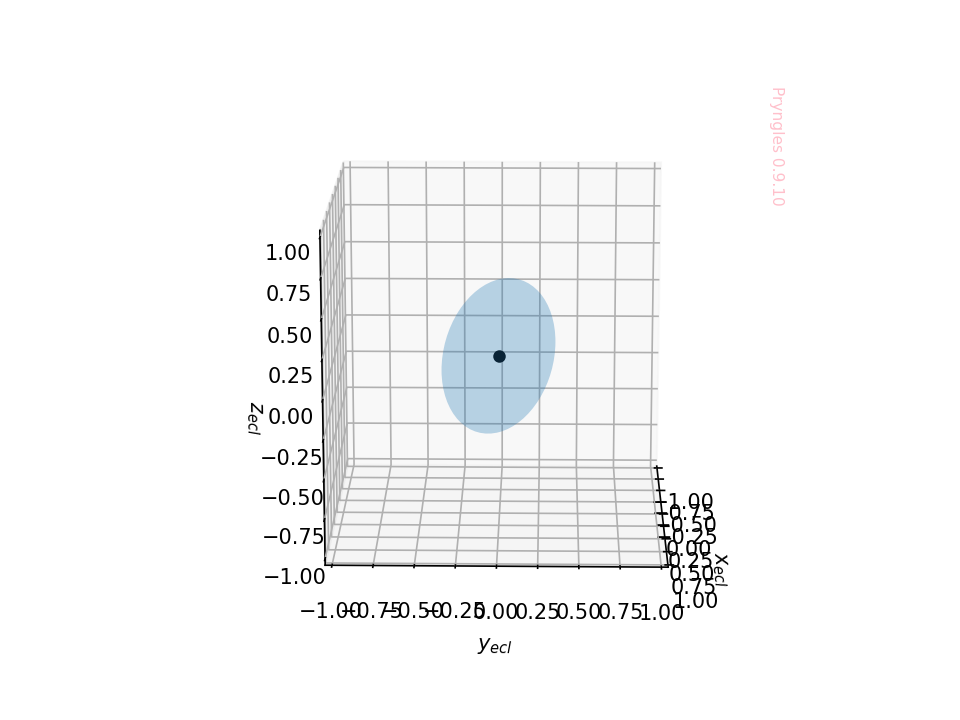

(0.75, 0.475, 0.25)


<IPython.core.display.Javascript object>


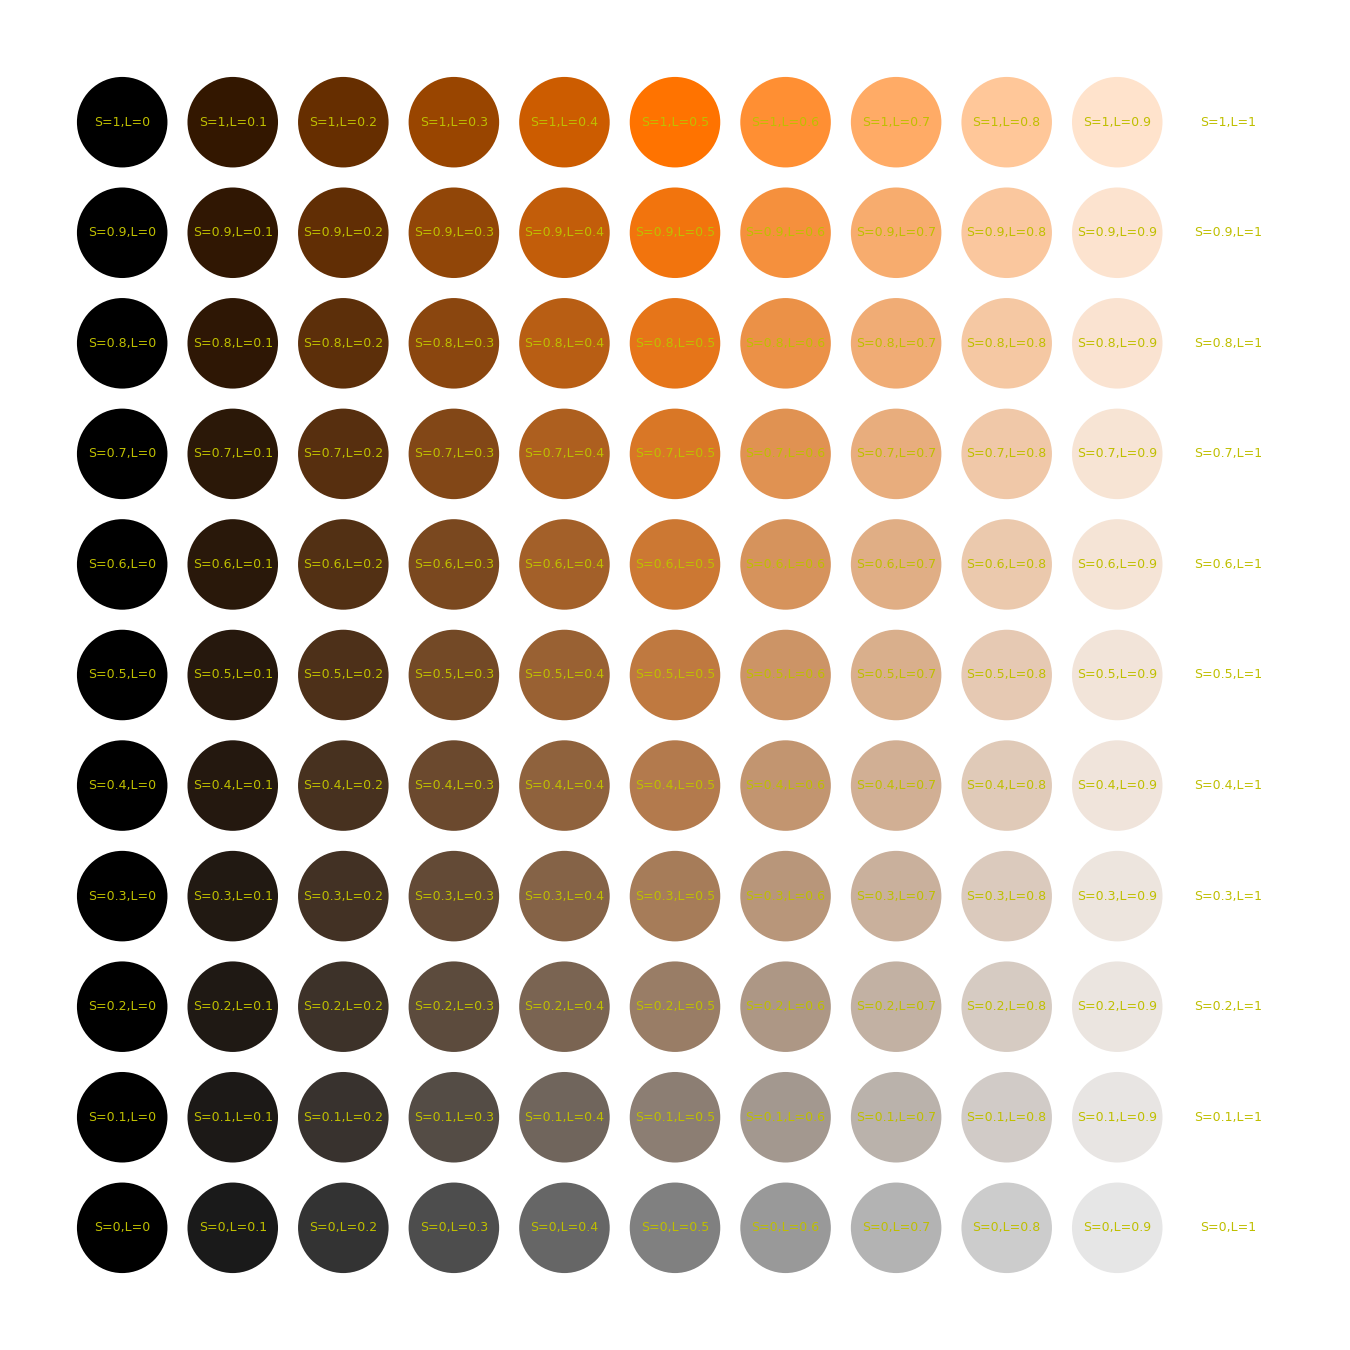

.
----------------------------------------------------------------------
Ran 1 test in 0.226s

OK


In [3]:
#@test:plot
def test_fun(self):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.plot([0],[0],[0],'ko',markersize=5)
    Plot.circle3d(ax,(0,0,0),0.5,zDir=[1,1,0],fill='None',alpha=0.3)
    #Decoration
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    ax.set_box_aspect([1,1,1])
    ax.set_xlabel("$x_{ecl}$")
    ax.set_ylabel("$y_{ecl}$")
    ax.set_zlabel("$z_{ecl}$")
    ax.view_init(elev=15,azim=1)
    Plot.pryngles_mark(ax)

    #rgb
    print(Plot.rgb([27,0.5,0.5]))

    #Color sample
    Plot.rgb_sample(27)
    
    plt.show()

class Test(unittest.TestCase):pass
Test.test_fun=test_fun
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

## Testing flybys

<IPython.core.display.Javascript object>


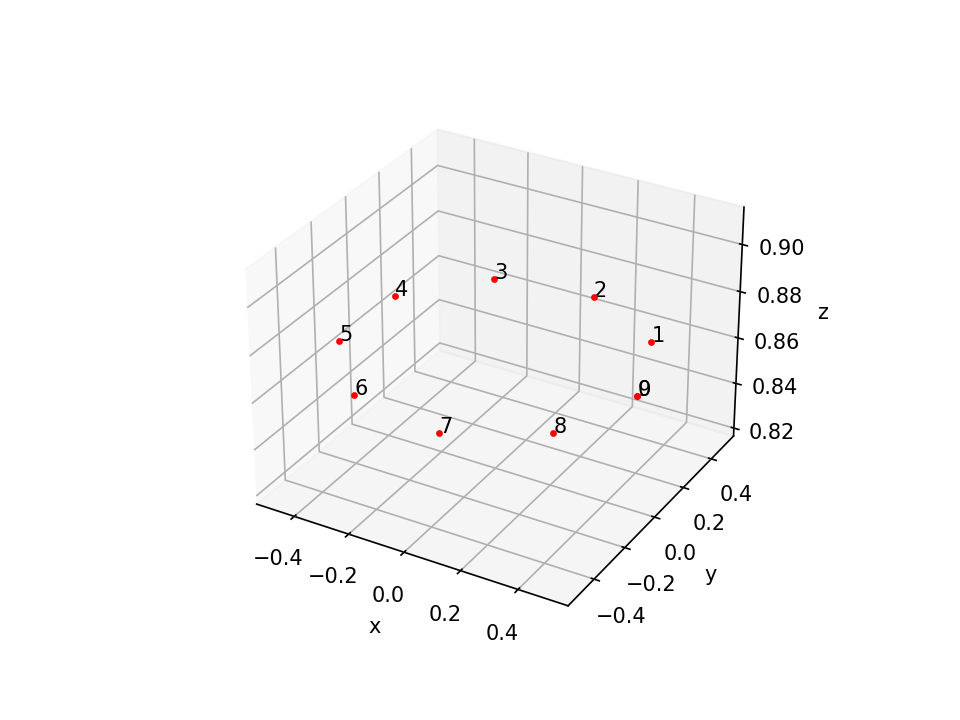

.
----------------------------------------------------------------------
Ran 1 test in 0.034s

OK


In [4]:
#@test:plot
def test_flyby(self):

    Verbose.VERBOSITY=VERB_SIMPLE

    nvecs=Plot.calc_flyby(normal=[0,0,1],lat=60)

    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')

    for i in range(len(nvecs)):
        ax.scatter(nvecs[i,0],nvecs[i,1],nvecs[i,2],c='r',s=5)
        ax.text(nvecs[i,0],nvecs[i,1],nvecs[i,2],i)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    plt.show()
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass
Test.test_flyby=test_flyby
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

## Animate rebound

<IPython.core.display.Javascript object>


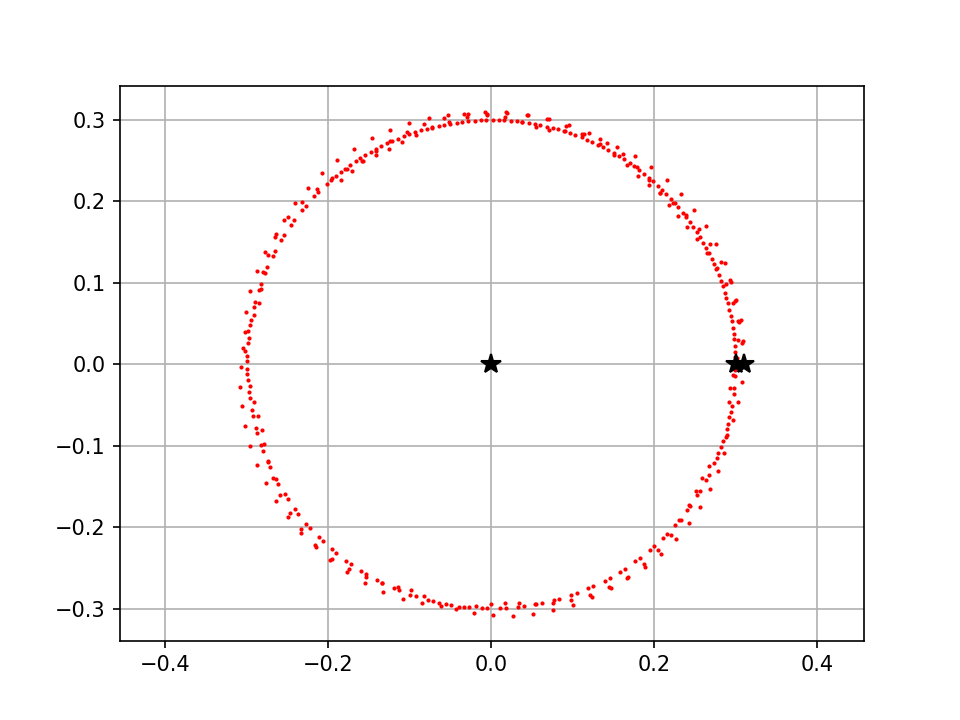

100%|██████████| 200/200 [00:00<00:00, 1383.96it/s]


<IPython.core.display.Javascript object>


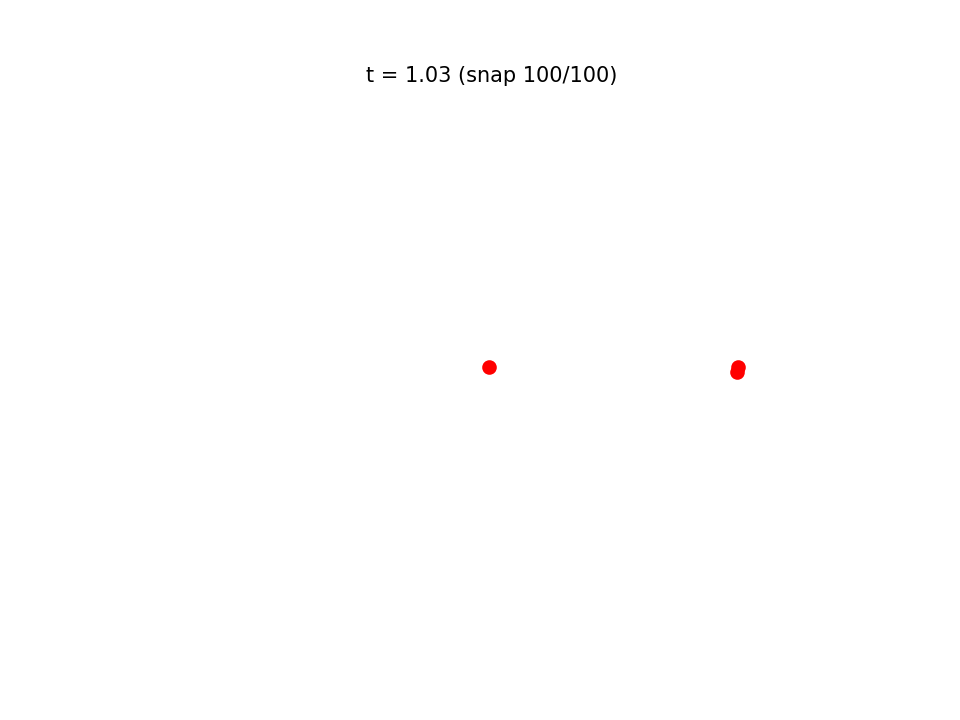

  0%|          | 0/100 [00:00<?, ?it/s]/Users/jorgezuluagacallejas/opt/anaconda3/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
100%|██████████| 100/100 [00:00<00:00, 496.51it/s]
.
----------------------------------------------------------------------
Ran 1 test in 1.448s

OK


In [5]:
#@test:plot
def test_animrb(self):

    Verbose.VERBOSITY=VERB_NONE

    sim=rb.Simulation()
    ms=1
    sim.add(m=1)
    mp=1e-3
    xp=0.3
    vp=np.sqrt(sim.G*ms/xp)
    sim.add(m=mp,x=xp,vy=vp)
    mm=1e-8
    xm=0.01
    vm=np.sqrt(sim.G*mp/xm)
    sim.add(m=mm,x=xp+xm,vy=vp+vm)
    P=sim.particles[1].P

    anim=Plot.animate_rebound(sim,traces=True,nsnap=200,axis=True,ms=1)

    anim=Plot.animate_rebound(sim,filename="/tmp/animate-rebound.gif",interval=20)

    plt.show()
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_animrb=test_animrb
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

### The end

In [34]:
#@end:module